In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Однорідні масиви та структуровані дані
- можна працювати з одноріними даними які представляють собою набір цифр а можна додати значення тим цифрам з якими ми працюємо

Приклад
- нам потрібно земулювати гру в якій є шахта яка виробляє залізну руда
Варіант 1. ми можемо просто задити дані які ми будемо вважати за виробництво руди

[1.]
[1. 1.]
[1. 1. 3.]
[1. 1. 3. 3.]
[1. 1. 3. 3. 3.]
[1. 1. 3. 3. 3. 2.]
[1. 1. 3. 3. 3. 2. 2.]
[1. 1. 3. 3. 3. 2. 2. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1. 3.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1. 3. 3.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1. 3. 3. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1. 3. 3. 1. 2.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 2. 1. 3. 3. 1. 2. 1.]
[1. 1. 3. 3. 3. 2. 2. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 

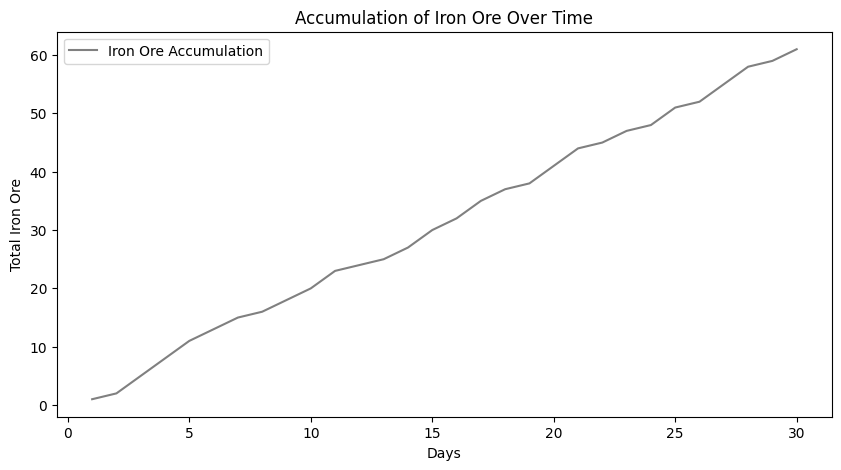

In [17]:
def produce_resource(reusource_type: np.array):
    """Це шахта яка виробляє залізну руду
    """
    return np.append(reusource_type, [np.random.randint(1, 4)])

start_resources = np.array([])
daily_production = []

for day in range(30):
    resource_storage = produce_resource(start_resources)
    print(resource_storage)
    start_resources = resource_storage
    daily_production.append(resource_storage.sum())

print(f"За місяць накопичилось руди : {resource_storage.sum()}")

# Графік для накопичення руди
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), daily_production, label='Iron Ore Accumulation', color='gray')
plt.xlabel('Days')
plt.ylabel('Total Iron Ore')
plt.title('Accumulation of Iron Ore Over Time')
plt.legend()
plt.show()

> поки ми працювали просто з числами яким надали певну інтерпретацію, але ми можемо самостійно визначити тип даних який вже буду вказувати з чим ми працюємо

Варіант 2. ми можемо структуризувати дані які будуть чітко вказувати що виробляє шахта

День 0: Ресурси в сховищі: [('Iron', 0) ('Copper', 0)]
Виробляємо Iron руду
День 1: Ресурси в сховищі: [('Iron', 3) ('Copper', 0)]
Виробляємо Iron руду
День 2: Ресурси в сховищі: [('Iron', 6) ('Copper', 0)]
Виробляємо Iron руду
День 3: Ресурси в сховищі: [('Iron', 7) ('Copper', 0)]
Виробляємо Copper руду
День 4: Ресурси в сховищі: [('Iron', 7) ('Copper', 3)]
Виробляємо Copper руду
День 5: Ресурси в сховищі: [('Iron', 7) ('Copper', 5)]
Виробляємо Copper руду
День 6: Ресурси в сховищі: [('Iron', 7) ('Copper', 6)]
Виробляємо Copper руду
День 7: Ресурси в сховищі: [('Iron', 7) ('Copper', 9)]
Виробляємо Copper руду
День 8: Ресурси в сховищі: [('Iron',  7) ('Copper', 10)]
Виробляємо Copper руду
День 9: Ресурси в сховищі: [('Iron',  7) ('Copper', 13)]
Виробляємо Copper руду
День 10: Ресурси в сховищі: [('Iron',  7) ('Copper', 14)]
Виробляємо Copper руду
День 11: Ресурси в сховищі: [('Iron',  7) ('Copper', 16)]
Виробляємо Iron руду
День 12: Ресурси в сховищі: [('Iron',  8) ('Copper', 16)]
Виро

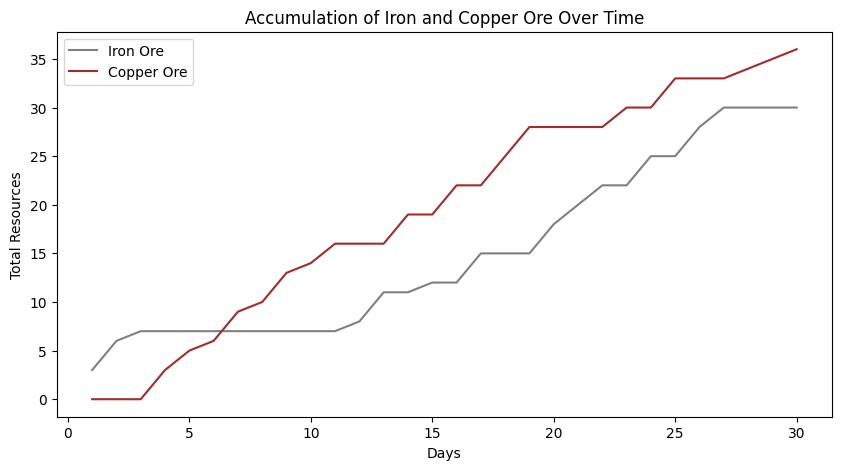

In [18]:
#                  Назва поля      його тип його довжина
ore = np.dtype([("resource_name", np.str_, 16), ("amount", np.int_)])

def mine_production(resources: np.array):
    """Шахта має сортувати руду яку виробляє
    """
    p = np.random.choice(['Iron', 'Copper'])
    for res in resources:
        if res["resource_name"] == p:
            print(f"Виробляємо {p} руду")
            res["amount"] += np.random.randint(1, 4)
    
    return resources

start_resources = np.array([('Iron', 0), ('Copper', 0) ], dtype=ore)
iron_accumulation = []
copper_accumulation = []

# Симуляція роботи шахти на 30 днів
for day in range(30):
    print(f"День {day}: Ресурси в сховищі: {start_resources}")
    resource_storage = mine_production(start_resources)
    start_resources = resource_storage
    # Накопичуємо значення для графіків
    iron_accumulation.append(resource_storage[0]["amount"])
    copper_accumulation.append(resource_storage[1]["amount"])

for ore_type in resource_storage:
    print(f"За місяць накопичилось руди : {ore_type["resource_name"]} {ore_type["amount"]}")

# Графік для накопичення заліза і міді
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), iron_accumulation, label='Iron Ore', color='gray')
plt.plot(range(1, 31), copper_accumulation, label='Copper Ore', color='brown')
plt.xlabel('Days')
plt.ylabel('Total Resources')
plt.title('Accumulation of Iron and Copper Ore Over Time')
plt.legend()
plt.show()
